In [ ]:
#problema de github https://github.com/CSC-CONICET/CURSO-LEARNING1/blob/main/tarea/tarea_clasificacion.pdf
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from urllib import request

#obtengo datos

example_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt" 
f = request.urlopen(example_url) 
dataset = np.loadtxt(f, dtype=float, delimiter=",")

#separo datos

notas = np.array(dataset[:,:2])
resultados = np.array(dataset[:,2])
mu = np.mean(notas, axis=0)
sigma = np.std(notas, axis=0)
notas = (notas-mu)/sigma
cant_datos = np.size(resultados)



In [16]:
#seteo y entrenamiento
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(1, input_dim=2)) 
model.summary() 
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) #patience = 1
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss= tf.keras.losses.BinaryCrossentropy(from_logits = True),metrics=['accuracy']) # LR = 0.001
hist = model.fit(x= notas, y= resultados, batch_size = cant_datos, epochs=20000, callbacks=[es]) #se bajo la cantidad de epochs por cuestiones de tiempo

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 14ms/step - loss: 0.2036 - accuracy: 0.8800
Epoch 3878/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.2036 - accuracy: 0.8800
Epoch 3879/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.2036 - accuracy: 0.8800
Epoch 3880/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.2036 - accuracy: 0.8800
Epoch 3881/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.2036 - accuracy: 0.8800
Epoch 3882/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.2036 - accuracy: 0.8800
Epoch 3883/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.2036 - accuracy: 0.8800
Epoch 3884/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.2036 - accuracy: 0.8800
Epoch 3885/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.2036 - accuracy: 0.8800
Epoch 3886/20000
1/1 [==========

parametros: [array([[3.961487 ],
       [3.6948483]], dtype=float32), array([1.7037854], dtype=float32)]
prediccion =  1 valor calculado: [[1.9704242]]


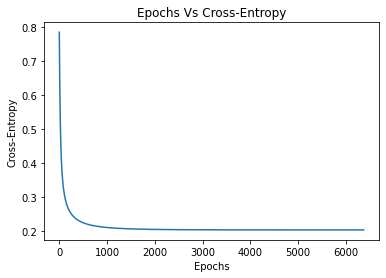

In [29]:
losses = np.array(hist.history['loss']) 
param = model.get_weights()
accuracy = np.array(hist.history['accuracy'])

a = np.array([63,55]).reshape(1,2)
a = (a-np.mean(a))/np.std(a)
prediction = model.predict(x=a)
w ,b = param
if(prediction > 0.5):
  result = 1
else:
  result = 0
plt.plot( losses)
#plt.ylim([0.525,0.64]) 
plt.title("Epochs Vs Cross-Entropy") 
plt.xlabel("Epochs") 
plt.ylabel("Cross-Entropy") 
print("parametros:",param)
print("prediccion = ",result, "valor calculado:", prediction)


In [24]:
w

array([[3.961487 ],
       [3.6948483]], dtype=float32)

Text(0, 0.5, 'Accuracy [%]')

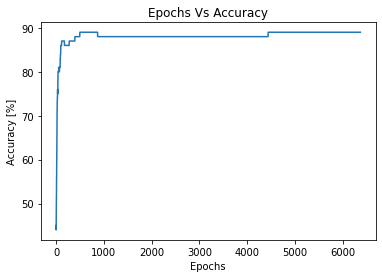

In [21]:
plt.plot(accuracy*100)
#plt.ylim([75,90]) 
plt.title("Epochs Vs Accuracy") 
plt.xlabel("Epochs") 
plt.ylabel("Accuracy [%]")

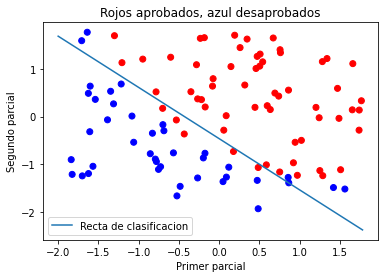

In [45]:
my_color = np.where(dataset[:,2]>=0.5, 'red', 'blue')
condicion = np.where(dataset[:,2]>=0.5, 'Aprobado', 'No aprobado')
plt.scatter(notas[:,0],notas[:,1], color = my_color)
plt.xlabel("Primer parcial")
plt.ylabel("Segundo parcial")
m = np.linspace(-2,1.78, 1000)
plt.title("Rojos aprobados, azul desaprobados")
plt.plot(m,(-b-w[0]*m)/w[1], label = 'Recta de clasificacion')
plt.legend()